In [3]:
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
dir_ = 'SBI_TEST2/2_LCFIT/FIT_BIASCOR_SPECZ_PLASTICC_BIASCOR/output/PIP_SBI_TEST2_PLASTICC_BIASCOR/FITOPT000.FITRES'

df  = pd.read_csv(dir_, comment="#", delim_whitespace=True)


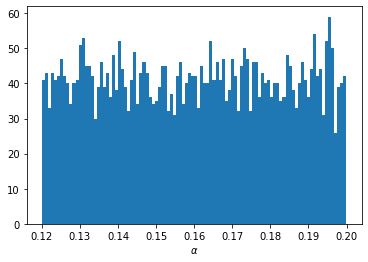

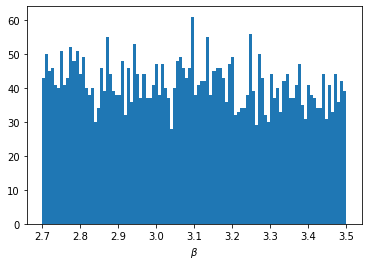

In [25]:

plt.hist(df['SIM_alpha'],bins=100)
plt.xlabel(r'$\alpha$')
plt.show()

plt.hist(df['SIM_beta'],bins=100)
plt.xlabel(r'$\beta$')
plt.show()

In [26]:
import numpy as np
dir2_ = 'SBI_TEST2/1_SIM/PLASTICC_BIASCOR/PIP_SBI_TEST2_PLASTICC_BIASCOR/PIP_SBI_TEST2_PLASTICC_BIASCOR.DUMP'

df2  = pd.read_csv(dir2_, comment="#", delim_whitespace=True)
mus = np.array([])
for i in range(len(df)):
    mus=np.append(mus,df2[np.logical_and(df2['CID']==df['CID'][i],df2['LIBID']==df['SIM_LIBID'][i])]['MU'])
    

In [28]:
M0_ = df['SIM_mB']+df['SIM_alpha']*df['SIM_x1']-df['SIM_beta']*df['SIM_c']-mus

M0=np.mean(M0_)
M0_std = np.std(M0_)

print(M0,M0_std)

-19.364999644511688 2.9221190455368568e-05


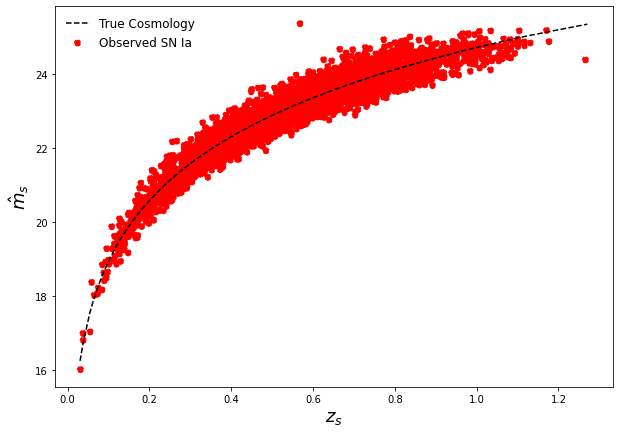

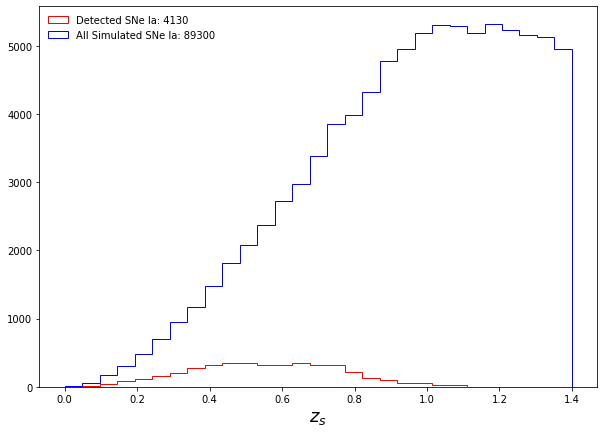

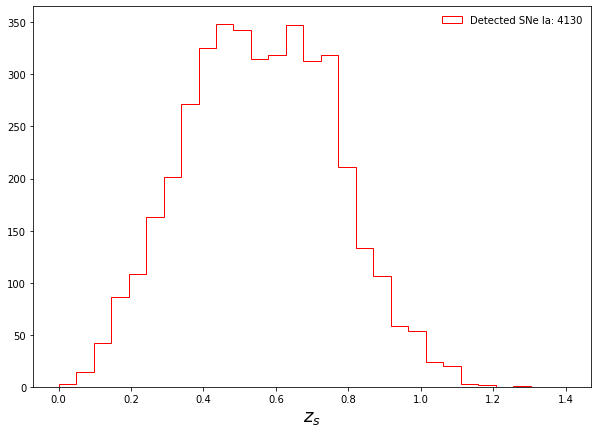

In [32]:
plt.figure(figsize=(10,7))
plt.plot(np.sort(df['SIM_ZCMB']),np.sort(M0+mus),linestyle='--',color='black',label='True Cosmology')
plt.scatter(df['zCMB'],df['mB'],linestyle='--',color='red',label='Observed SN Ia ')
plt.legend(frameon=False,fontsize=12)
plt.xlabel(r'$z_s$',fontsize=18)
plt.ylabel(r'$\hat{m}_s$', fontsize=18)
plt.show()

plt.figure(figsize=(10,7))
bins = np.linspace(0,1.4,30)
plt.hist(df['zCMB'],bins=bins,histtype='step',color='red',density=False,label='Detected SNe Ia: '+str(len(df['zCMB'])))
plt.hist(df2['ZCMB'],bins=bins,histtype='step',color='blue',density=False,label='All Simulated SNe Ia: '+str(len(df2['ZCMB'])))
plt.xlabel(r'$z_s$',fontsize=18)
plt.legend(frameon=False)
plt.show()

plt.figure(figsize=(10,7))
bins = np.linspace(0,1.4,30)
plt.hist(df['zCMB'],bins=bins,histtype='step',color='red',density=False,label='Detected SNe Ia: '+str(len(df['zCMB'])))
plt.xlabel(r'$z_s$',fontsize=18)
plt.legend(frameon=False)
plt.show()